# DEMO: Ley 81 y Proteccion de Datos + OpenAI
by: https://www.linkedin.com/in/eduardo-perez-denadai-759172101/

En este demo utilizamos el modelo de lenguaje de Open AI GPT para realizar preguntas y respuestas sobre

In [ ]:
%%bash
pip install chromadb
pip install langchain
pip3 install PIL
pip3 install pytesseract
pip3 install pdf2image
sudo apt-get install tesseract-ocr -y
apt-get install poppler-utils -y

In [64]:
from PIL import Image as PILImage
from utils.utils import image_export_to_html


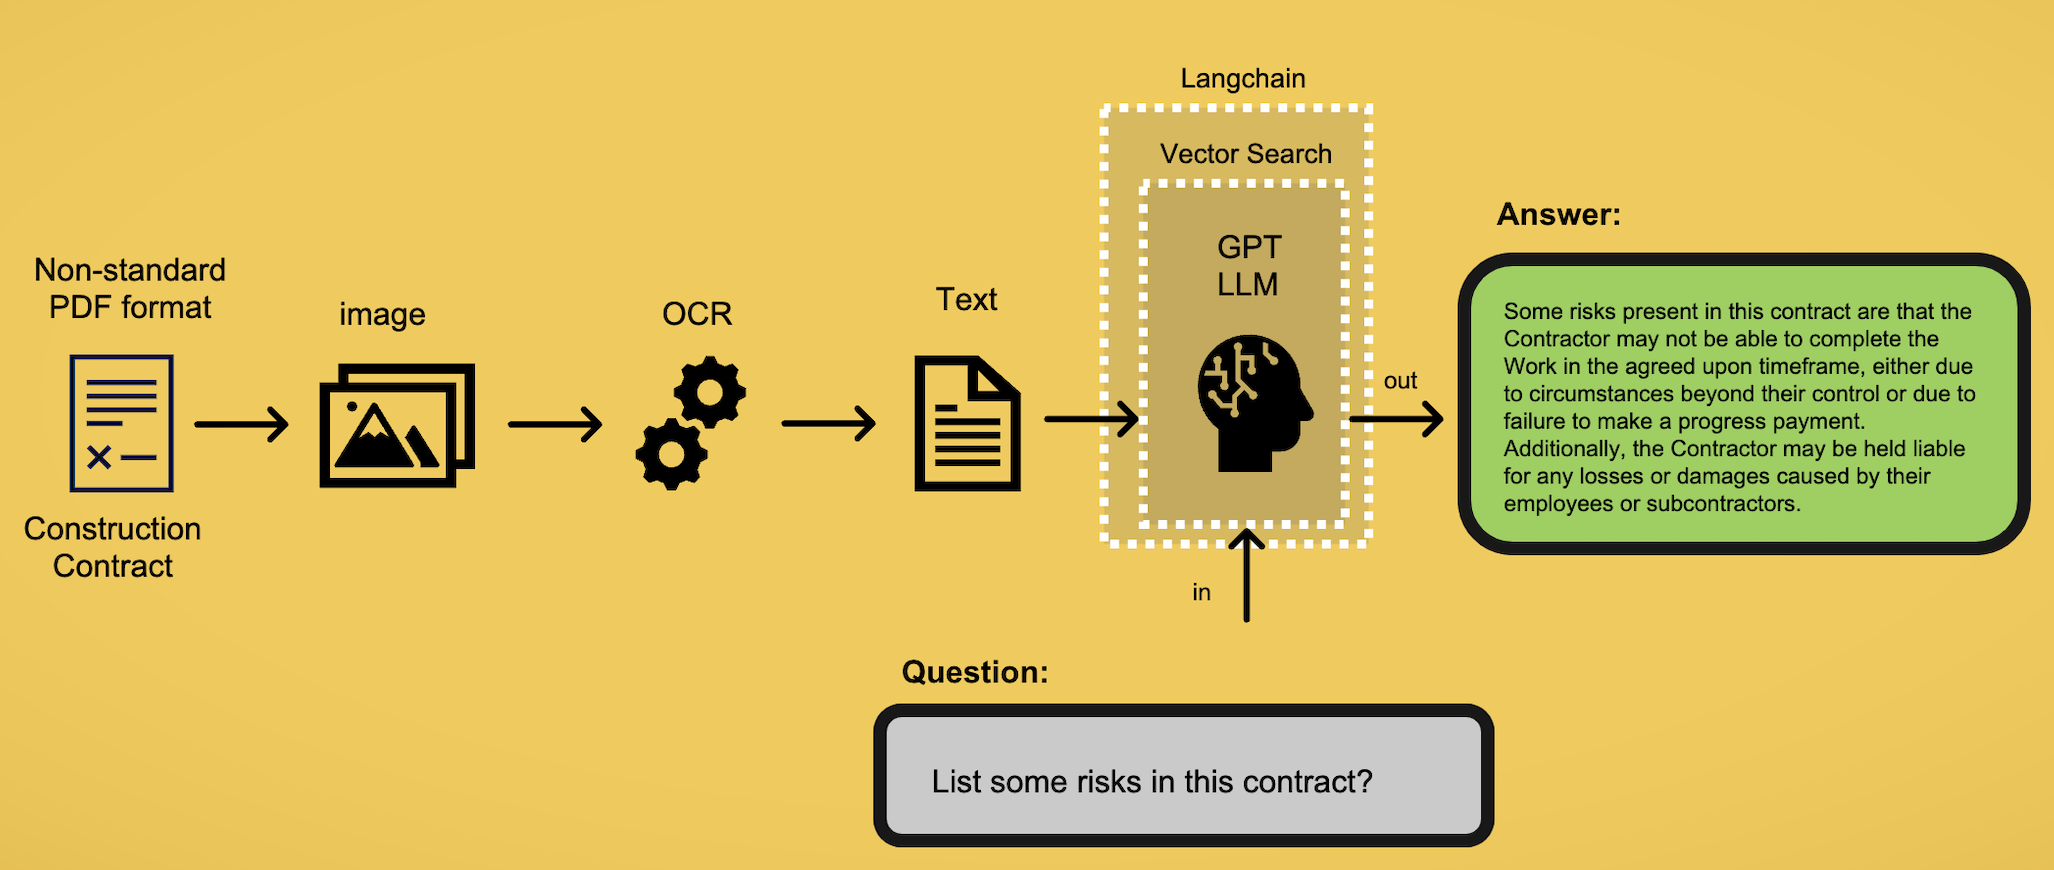

In [71]:
html = image_export_to_html("../static/system.png", 800,400)
IPython.display.HTML(html)

# STEP 1: Convert PDF -> Image -> Text Extraction OCR

In [6]:
# Import libraries
import platform
from tempfile import TemporaryDirectory
from pathlib import Path
 
import pytesseract
from pdf2image import convert_from_path
from PIL import Image

In [11]:
PDF_file = "../data/ley81/pdf/ley_81.pdf"

In [12]:
# read pdf to image
pdf_pages = convert_from_path(PDF_file)

# convert pdf to JPEG 

In [13]:
image_file_list = []
for page_enumeration, page in enumerate(pdf_pages, start=0):
    # enumerate() "counts" the pages for us.
    # Create a file name to store the image
    filename = f"../data/ley81/img/page_{page_enumeration}.jpg"
    # Save the image of the page in system
    page.save(filename, "JPEG")
    image_file_list.append(filename)

# JPEG to TEXT via OCR

In [14]:
text_file = "../data/ley81/txt/ley_81.txt"
with open(text_file, "a") as output_file:
    # Open the file in append mode
    for image_file in image_file_list:
        # Recognize the text as string in image using pytesserct
        text = str(((pytesseract.image_to_string(Image.open(image_file)))))
        # In many PDFs, at line ending, if a word can't
        # be written fully, a 'hyphen' is added.
        # The rest of the word is written in the next line
        # To remove this, we replace every '-\n' to ''.
        text = text.replace("-\n", "")
 
                # Finally, write the processed text to the file.
        output_file.write(text)

# Sample of final result


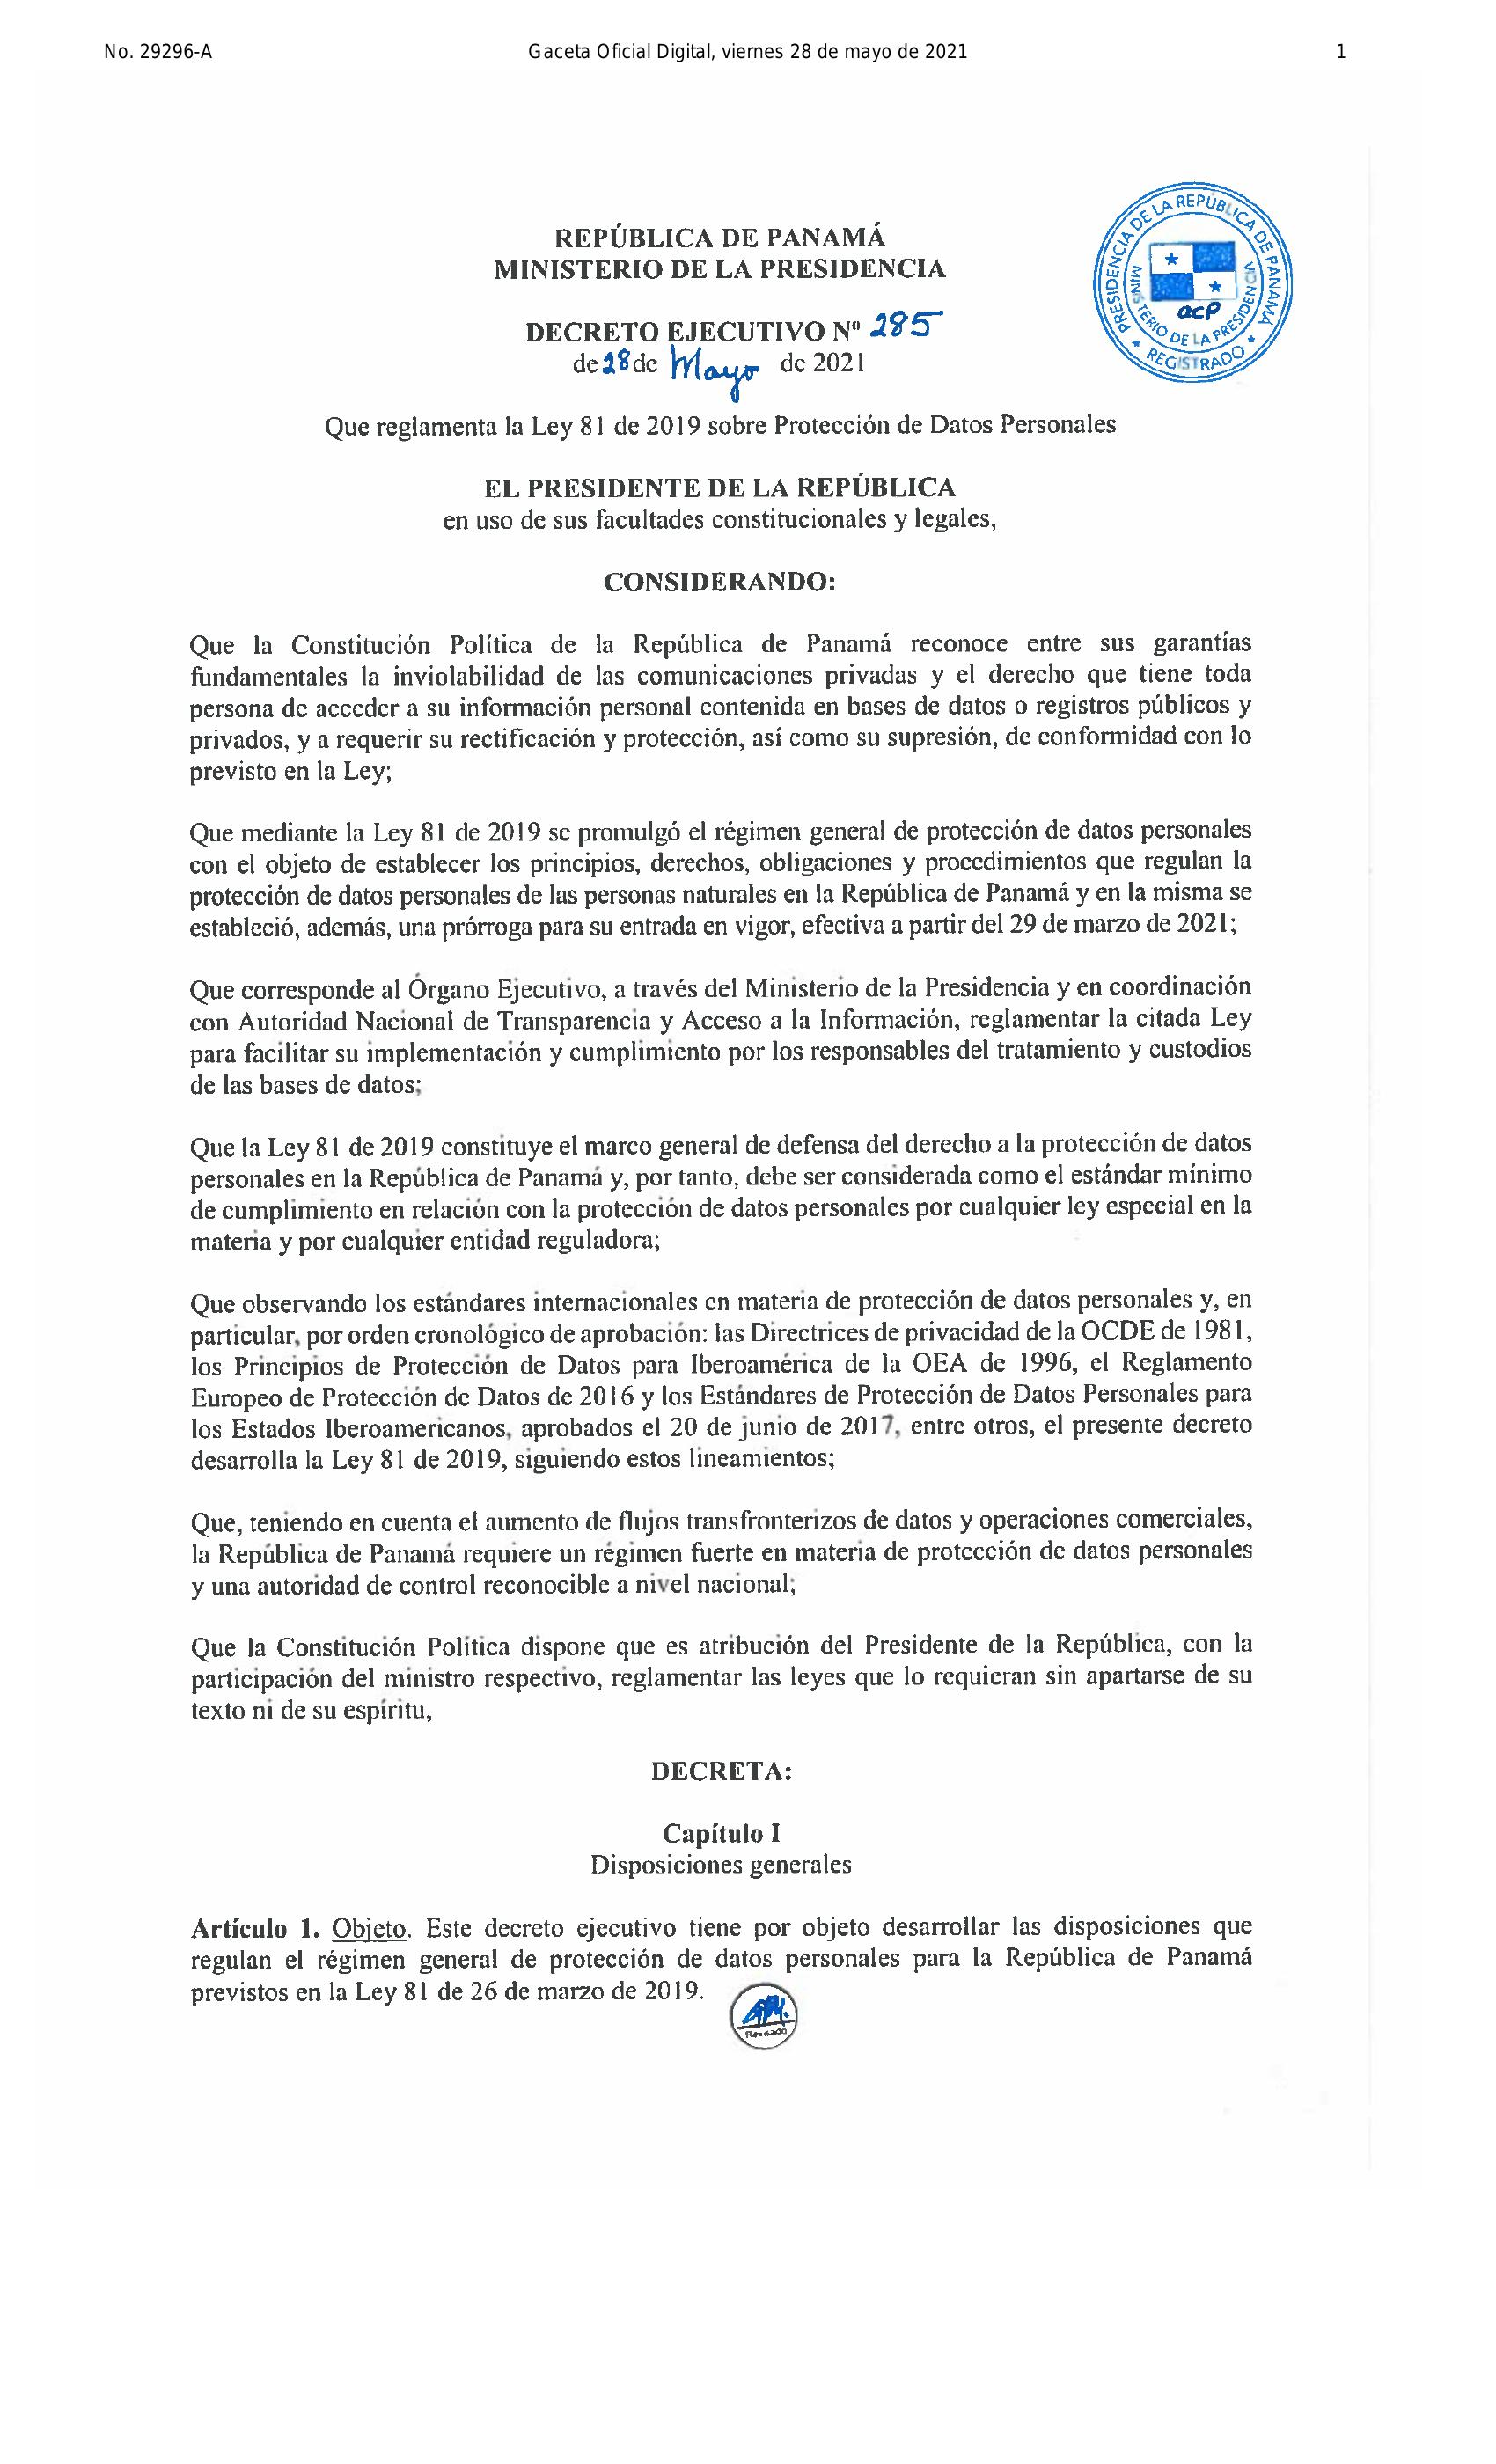

In [72]:
html = image_export_to_html("../data/ley81/img/page_0.jpg", 500,700)
IPython.display.HTML(html)

# GPT Embedding Search

In [18]:
import os
from langchain.llms.openai import OpenAI
from langchain.chains import RetrievalQA
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter

In [19]:
os.environ['OPENAI_API_KEY']=  "YOUR OPEN AI KEY"

In [21]:
loader = TextLoader('../data/ley81/txt/ley_81.txt', encoding='utf8')
documents = loader.load()
text_splitter = CharacterTextSplitter(chunk_size=1_000, chunk_overlap=0)
texts = text_splitter.split_documents(documents)

Created a chunk of size 1127, which is longer than the specified 1000
Created a chunk of size 1052, which is longer than the specified 1000
Created a chunk of size 1291, which is longer than the specified 1000


In [22]:
# use GPT3.5 Embeddings
embeddings = OpenAIEmbeddings()
# load vector embeddings into Vector DB
db = Chroma.from_documents(texts, embeddings)

# set up Chroma as a retriever
retriever = db.as_retriever()
qa = RetrievalQA.from_chain_type(llm=OpenAI(), 
                                 chain_type="stuff", 
                                 retriever=retriever)


Using embedded DuckDB without persistence: data will be transient


In [23]:
query = "Que dice el articulo 3?"
print(qa.run(query).lstrip())

El articulo 3 dice que quedan sujetos a protección los tratamientos de datos personales de las personas naturales, siempre que estos datos los identifiquen o los hagan identificables. Los derechos de las personas fallecidas en relación con sus datos personales se rigen por las reglas generales del Código Civil. En el caso de tratamiento de datos personales de menores de edad, se dará prioridad al interés superior del menor conforme a las normas de la República de Panamá y a los tratados internacionales existentes en la materia.


In [29]:
query = "Como se define el Custodio de una base de datos y cuales son algunas de sus responsabilidades. Temperature = 1.8"
print(qa.run(query).lstrip())

El Custodio de una base de datos es el responsable de implementar las medidas de seguridad para proteger los datos personales tratados por el responsable del tratamiento. Sus responsabilidades incluyen seguir las instrucciones del responsable del tratamiento, implementar medidas de seguridad, informar al responsable del tratamiento cuando ocurra una violación de la seguridad de los datos personales, mantener la confidencialidad de los datos personales tratados, y asegurar el cumplimiento de los principios y obligaciones establecidos en la Ley 81 de 2019 y en el presente decreto.


In [30]:
query = "Segun esta ley cual es el uso apropiado de los datos?"
print(qa.run(query).lstrip())

Segun esta ley, el uso apropiado de los datos incluye recabarlos sin engaño o falsedad, con fines determinados y legítimos, con el objeto de minimizar los datos objeto de tratamiento, conocer los riesgos que impliquen los tratamientos y adoptar las medidas y garantías necesarias para mitigarlos, y mantener la confidencialidad.


In [33]:
query = """
Una institucion financiera maneja datos importantes de los clientes. 
Como podria un banco iniciar un programa de proteccion de datos que cumpla con lo establecido por esta ley?
"""
print(qa.run(query).lstrip())

Un banco podría iniciar un programa de protección de datos cumpliendo con las medidas establecidas por esta ley, tales como revisar periódicamente los procedimientos de gestión y transferencia segura de los datos personales para determinar las modificaciones que se requieran; cumplir con las normas o estándares nacionales e internacionales en materia de protección de datos personales; adoptar mecanismos de autorregulación vinculantes en materia de protección de datos personales; elaborar y mantener actualizado el registro de bases de datos a que se refiere la Ley 81 de 2019; evaluar el impacto de los tratamientos de datos a realizar, antes de su ejecución, para garantizar la proporcionalidad y minimización de datos en el tratamiento; establecer protocolos para la atención y respuesta al ejercicio de


In [37]:
query = """
Luego de entender este documento. 
Escribe un indice del contenido de un plan de proteccion de datos del consumidor para un banco.
set temperature = 0.8
"""
print(qa.run(query).lstrip())

1. Objetivo y alcance del plan de protección de datos
2. Políticas y principios para el tratamiento de datos personales
3. Responsabilidades de los responsables y custodios de la base de datos
4. Medidas de seguridad para garantizar la protección de los datos personales
5. Evaluación de impacto en la protección de datos personales
6. Obligaciones de proporcionalidad y confidencialidad
7. Plazos de conservación de los datos
8. Protocolos aplicables a la base de datos
9. Descripción técnica de la base de datos
10. Identificación de personas autorizadas para acceder a los datos
11. Mantenimiento de un registro actualizado de tratamientos de datos
12. Sensibilización sobre la protección de los datos personales


# That's It!

we have seen how leveraging state of the art LLM can help in document understanding and knowledge extraction